Predictive model: We use a predictive model to classify patients who have                        
stroke. We evaluate the performance of the model and suggest which features may be                 useful in stroke prediction.

A report of the findings and analysis can be found [here](https://github.com/TBourton/Public/blob/master/Stroke_with_Decision_Trees_project/report.pdf)

Written by Thomas Bourton

In [1]:
#Import Libs
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import seaborn as sns
from sklearn.utils import resample

In [2]:
training_data= pd.read_csv("train_2v.csv")
test_data=pd.read_csv("test_2v.csv")

In [3]:
training_data.head(n=5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [4]:
training_data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,36326.142350,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,21072.134879,22.519649,0.291235,0.212733,43.111751,7.770020,0.133103
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,18038.500000,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,36351.500000,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,54514.250000,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


In [5]:
test_data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi
count,18601.000000,18601.000000,18601.000000,18601.000000,18601.000000,18010.000000
mean,36747.368045,42.056504,0.093167,0.048062,104.386359,28.545325
std,21053.151124,22.528018,0.290674,0.213903,42.606714,7.757092
min,2.000000,0.080000,0.000000,0.000000,55.000000,10.200000
25%,18542.000000,24.000000,0.000000,0.000000,77.550000,23.300000
50%,36717.000000,43.000000,0.000000,0.000000,91.830000,27.700000
75%,55114.000000,60.000000,0.000000,0.000000,112.310000,32.800000
max,72942.000000,82.000000,1.000000,1.000000,275.720000,88.300000


In [6]:
training_data['stroke'].value_counts()

0    42617
1      783
Name: stroke, dtype: int64

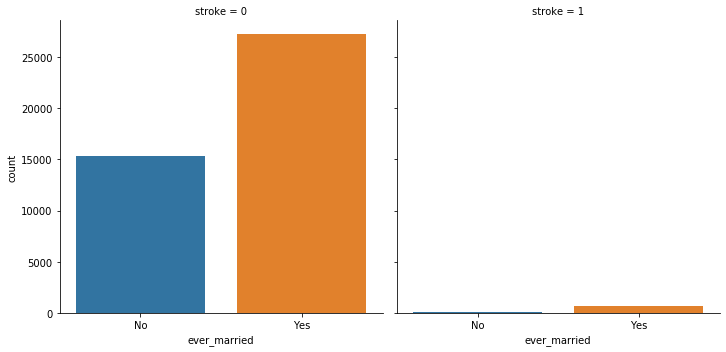

In [7]:
sns.catplot(x='ever_married',kind='count',col='stroke',data=training_data)

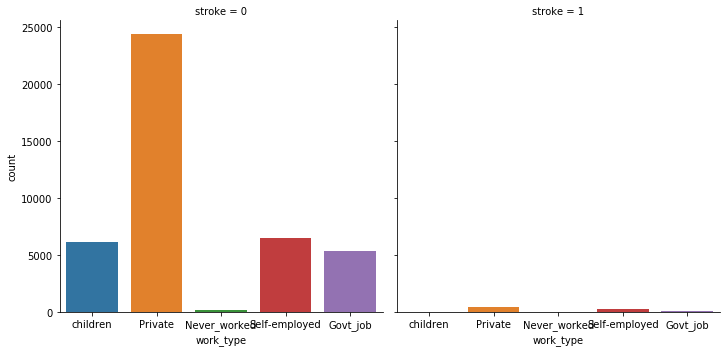

In [8]:
sns.catplot(x='work_type',kind='count',col='stroke',data=training_data)

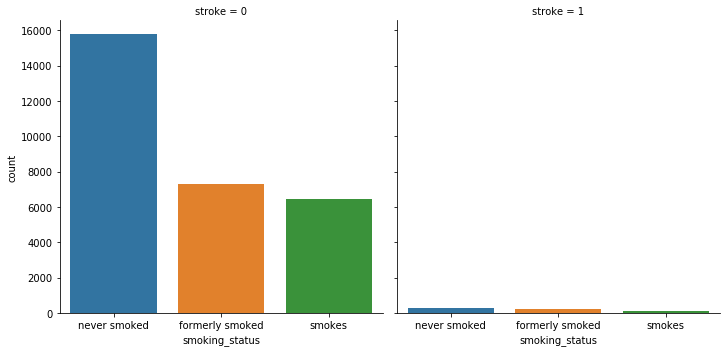

In [9]:
sns.catplot(x='smoking_status',kind='count',col='stroke',data=training_data)

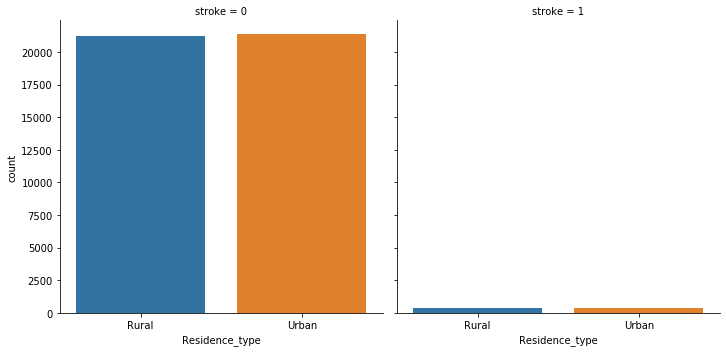

In [10]:
sns.catplot(x='Residence_type',kind='count',col='stroke',data=training_data)

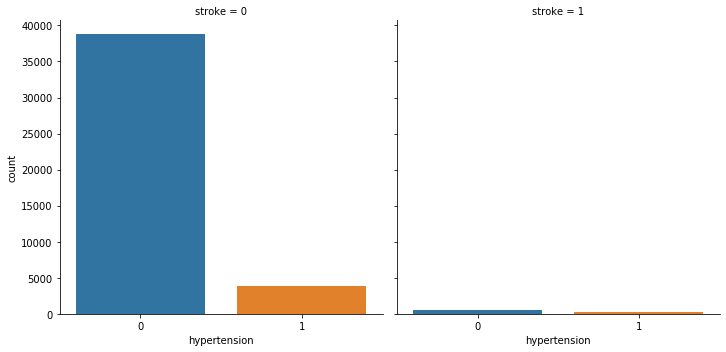

In [11]:
sns.catplot(x='hypertension',kind='count',col='stroke',data=training_data)

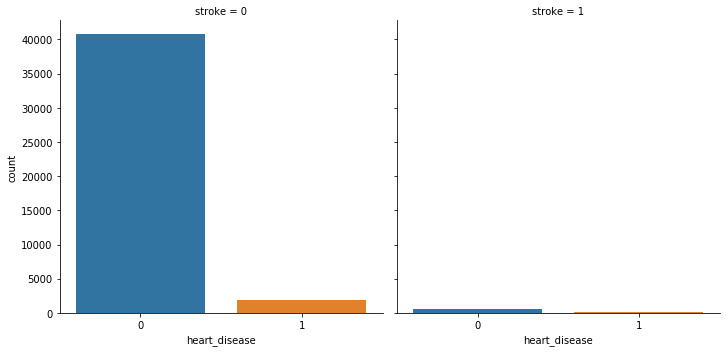

In [12]:
sns.catplot(x='heart_disease',kind='count',col='stroke',data=training_data)

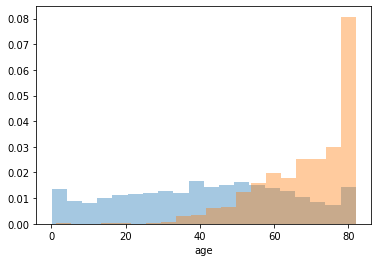

In [13]:
sns.distplot(training_data.loc[training_data['stroke'] == 0]['age'],kde=False, norm_hist=True, bins=20)
sns.distplot(training_data.loc[training_data['stroke'] == 1]['age'],kde=False, norm_hist=True, bins=20)

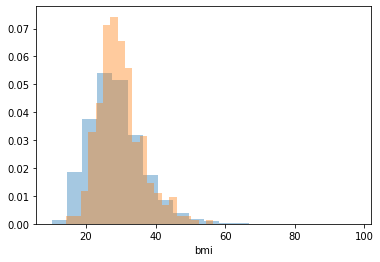

In [14]:
sns.distplot(training_data.loc[training_data['stroke'] == 0]['bmi'],kde=False, norm_hist=True, bins=20)
sns.distplot(training_data.loc[training_data['stroke'] == 1]['bmi'],kde=False, norm_hist=True, bins=20)

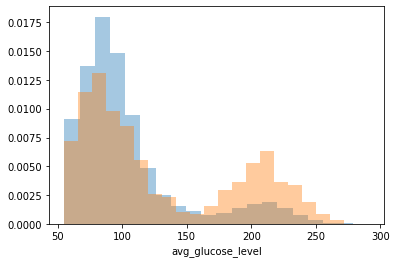

In [15]:
sns.distplot(training_data.loc[training_data['stroke'] == 0]['avg_glucose_level'],kde=False, norm_hist=True, bins=20)
sns.distplot(training_data.loc[training_data['stroke'] == 1]['avg_glucose_level'],kde=False, norm_hist=True, bins=20)

# Data Wrangling

### Missing data

In [16]:
#check for missing trainign_data
missing_training_data = training_data.isnull()
for column in missing_training_data.columns.values.tolist():
    if True in missing_training_data[column].value_counts().index.tolist():
        print(column)
        print (missing_training_data[column].value_counts())
        print("") 

bmi
False    41938
True      1462
Name: bmi, dtype: int64

smoking_status
False    30108
True     13292
Name: smoking_status, dtype: int64



In [17]:
#check for missing test_data
missing_test_data = test_data.isnull()
for column in missing_test_data.columns.values.tolist():
    if True in missing_test_data[column].value_counts().index.tolist():
        print(column)
        print (missing_test_data[column].value_counts())
        print("") 

bmi
False    18010
True       591
Name: bmi, dtype: int64

smoking_status
False    12850
True      5751
Name: smoking_status, dtype: int64



Clearly bmi and smoking_status contain a lot of missing values in both training and test data
For BMI we can replace the missing data with the average

In [18]:
training_data['bmi'].replace(np.nan, training_data['bmi'].astype('float').mean(axis=0), inplace=True)
test_data['bmi'].replace(np.nan, test_data['bmi'].astype('float').mean(axis=0), inplace=True)

~30% of smoking data is missing, hence it seems reasonable to consider dropping this data or replacing it

## Catagorised data
we are going to build decision tree so we need to turn "ever_married, work_type, residence_type,smoking status" to numerical values

In [19]:
lbl=preprocessing.LabelEncoder()
training_data['gender'] = lbl.fit_transform(training_data['gender'])
training_data['ever_married'] = lbl.fit_transform(training_data['ever_married'])
training_data['work_type'] = lbl.fit_transform(training_data['work_type'])
training_data['Residence_type'] = lbl.fit_transform(training_data['Residence_type'])
test_data['gender'] = lbl.fit_transform(test_data['gender'])
test_data['ever_married'] = lbl.fit_transform(test_data['ever_married'])
test_data['work_type'] = lbl.fit_transform(test_data['work_type'])
test_data['Residence_type'] = lbl.fit_transform(test_data['Residence_type'])

In [20]:
#We can consider dropping smoking data all together
training_data_nosmoke=training_data.drop(columns='smoking_status',axis=1,inplace=False)
test_data_nosmoke=test_data.drop(columns='smoking_status',axis=1,inplace=False)

# Or replace by mode
training_data['smoking_status'].fillna(training_data['smoking_status'].mode()[0], inplace=True)
training_data['smoking_status'] = lbl.fit_transform(training_data['smoking_status'])
test_data['smoking_status'].fillna(test_data['smoking_status'].mode()[0], inplace=True)
test_data['smoking_status'] = lbl.fit_transform(test_data['smoking_status'])

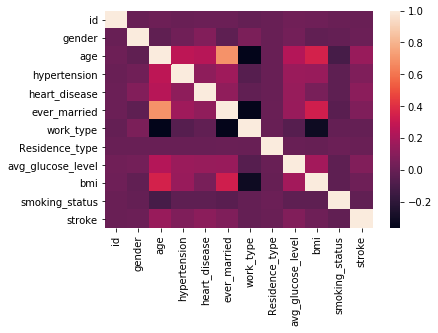

In [21]:
# Correlation heatmap
corr = training_data.corr()
sns.heatmap(corr,xticklabels=corr.columns, yticklabels=corr.columns)

# Building the Decision Tree

Now that we have cleaned up our data we will build our decision tree

#### With mode smoking data

In [25]:
features = list(training_data.columns[1:11])
X = training_data[features]
y = training_data['stroke']

In [26]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.2,random_state=1)
tree = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=30,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=98, splitter='best')
tree.fit(X_trainset,y_trainset)

#prediction on the known test set
pred = tree.predict(X_testset)
print("Precision: ", metrics.precision_score(y_testset,pred))
print("Accuracy: ", metrics.accuracy_score(y_testset, pred))
print("Classification report: ")
print(metrics.classification_report(y_testset,pred))
print("")
print("Confusion matrix: ")
print(metrics.confusion_matrix(y_testset,pred))

Precision:  0.16666666666666666
Accuracy:  0.9827188940092166
Classification report: 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8538
           1       0.17      0.01      0.03       142

   micro avg       0.98      0.98      0.98      8680
   macro avg       0.58      0.51      0.51      8680
weighted avg       0.97      0.98      0.98      8680


Confusion matrix: 
[[8528   10]
 [ 140    2]]


In [27]:
#Imbalanced data
from imblearn.over_sampling import RandomOverSampler, SMOTE
from collections import Counter
ros=RandomOverSampler(random_state=42)
sm = SMOTE(random_state=27, ratio=1.0)

print(training_data.stroke.value_counts())


#X_res,y_res =ros.fit_resample(X_trainset,y_trainset)
X_res, y_res = sm.fit_sample(X_trainset, y_trainset)
#con=pd.concat([X_trainset,y_trainset], axis=1)
#stroke = con[con.stroke==1]
#no_stroke = con[con.stroke==0]
#stroke_upsampled = resample(stroke,
#                          replace=True, # sample with replacement
#                          n_samples=len(no_stroke), # match number in majority class
#                          random_state=27) # reproducible results

# combine majority and upsampled minority
#upsampled = pd.concat([no_stroke, stroke_upsampled])

# check new class counts
print('Resampled dataset shape %s' % Counter(y_res))


#X_trainset_up = upsampled[features]
#y_trainset_up = upsampled['stroke']


#tree_up = DecisionTreeClassifier()
#tree_up.fit(X_trainset_up,y_trainset_up)
#pred_up = tree.predict(X_testset)
tree_up = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=15,
                       max_features=None, max_leaf_nodes=30,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=98, splitter='best')
tree_up.fit(X_res,y_res)
pred_up = tree_up.predict(X_testset)
#prediction on the known test set
print("Precision: ", metrics.precision_score(y_testset,pred_up))
print("Accuracy: ", metrics.accuracy_score(y_testset,pred_up))
print("Classification report: ")
print(metrics.classification_report(y_testset,pred_up))
print("")
print("Confusion matrix: ")
print(metrics.confusion_matrix(y_testset,pred_up))

0    42617
1      783
Name: stroke, dtype: int64
Resampled dataset shape Counter({0: 34079, 1: 34079})
Precision:  0.0921409214092141
Accuracy:  0.948963133640553
Classification report: 
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      8538
           1       0.09      0.24      0.13       142

   micro avg       0.95      0.95      0.95      8680
   macro avg       0.54      0.60      0.55      8680
weighted avg       0.97      0.95      0.96      8680


Confusion matrix: 
[[8203  335]
 [ 108   34]]


In [28]:
#undersample
from sklearn.utils import resample
# downsample majority
Z = pd.concat([X_trainset, y_trainset], axis=1)
not_stroke = Z[Z.stroke==0]
stroke = Z[Z.stroke==1]
not_stroke_downsampled = resample(not_stroke,
                                replace = False, # sample without replacement
                                n_samples = len(stroke), # match minority n
                                random_state = 27) # reproducible results

# combine minority and downsampled majority
downsampled = pd.concat([not_stroke_downsampled, stroke])

# checking counts
downsampled.stroke.value_counts()
y_down= downsampled.stroke
X_down = downsampled.drop('stroke', axis=1)

tree_down = DecisionTreeClassifier()
tree_down.fit(X_down,y_down)
pred_down = tree_up.predict(X_testset)
#prediction on the known test set
print("Precision: ", metrics.precision_score(y_testset,pred_down))
print("Accuracy: ", metrics.accuracy_score(y_testset,pred_down))
print("Classification report: ")
print(metrics.classification_report(y_testset,pred_down))
print("")
print("Confusion matrix: ")
print(metrics.confusion_matrix(y_testset,pred_down))

Precision:  0.0921409214092141
Accuracy:  0.948963133640553
Classification report: 
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      8538
           1       0.09      0.24      0.13       142

   micro avg       0.95      0.95      0.95      8680
   macro avg       0.54      0.60      0.55      8680
weighted avg       0.97      0.95      0.96      8680


Confusion matrix: 
[[8203  335]
 [ 108   34]]


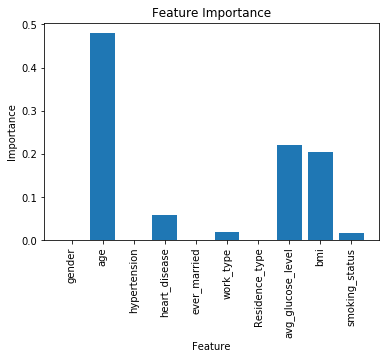

['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']


In [29]:
# plot feature importance
plt.bar(range(len(tree.feature_importances_)), tree.feature_importances_)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.xticks(range(len(tree.feature_importances_)), features,rotation='vertical')
plt.show()
print(features)

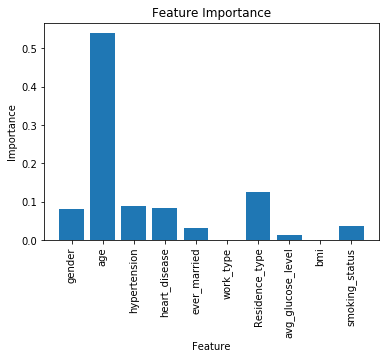

['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']


In [30]:
# plot feature importance
plt.bar(range(len(tree_up.feature_importances_)), tree_up.feature_importances_)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.xticks(range(len(tree_up.feature_importances_)), features,rotation='vertical')
plt.show()
print(features)

In [31]:
#prediction on unknown test data
pred=tree.predict(test_data[features])
prediction = pd.DataFrame(pred,columns=['pred_stroke'])
test_data['stroke']=prediction['pred_stroke']
test_data['stroke'].value_counts()

0    18579
1       22
Name: stroke, dtype: int64

In [32]:
#prediction on unknown test data
pred=tree_up.predict(test_data[features])
prediction = pd.DataFrame(pred,columns=['pred_stroke'])
test_data['stroke']=prediction['pred_stroke']
test_data['stroke'].value_counts()

0    17701
1      900
Name: stroke, dtype: int64

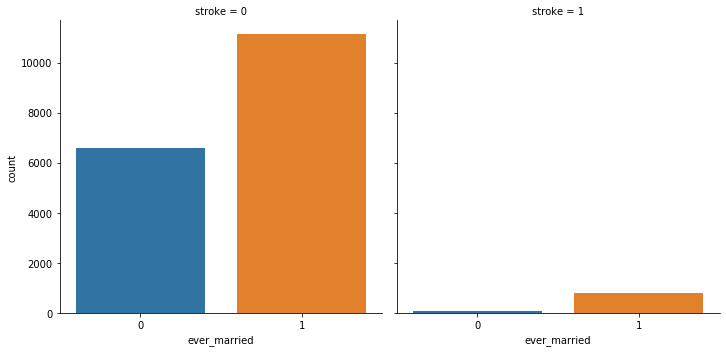

In [33]:
sns.catplot(x='ever_married',kind='count',col='stroke',data=test_data)

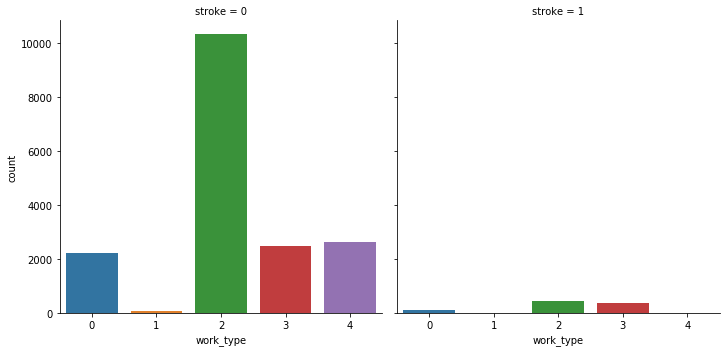

In [34]:
sns.catplot(x='work_type',kind='count',col='stroke',data=test_data)

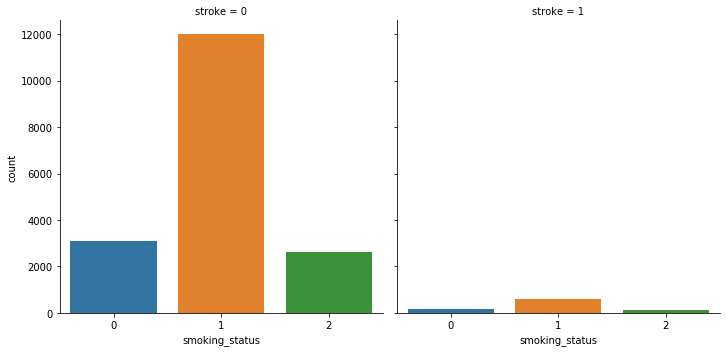

In [35]:
sns.catplot(x='smoking_status',kind='count',col='stroke',data=test_data)

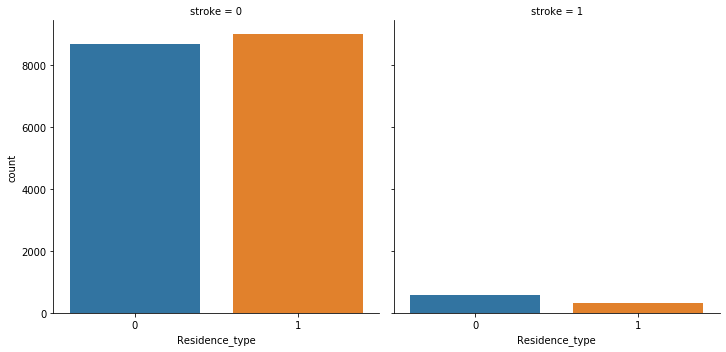

In [36]:
sns.catplot(x='Residence_type',kind='count',col='stroke',data=test_data)

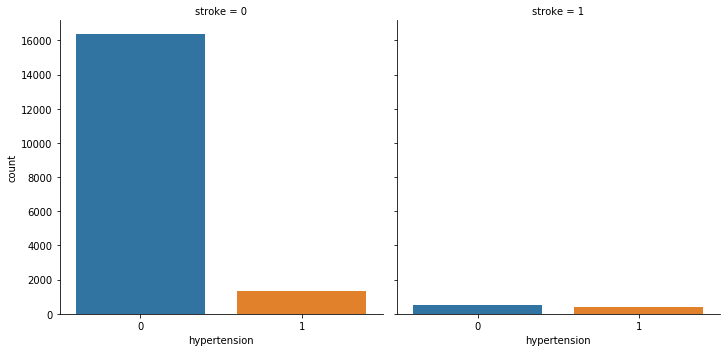

In [37]:
sns.catplot(x='hypertension',kind='count',col='stroke',data=test_data)

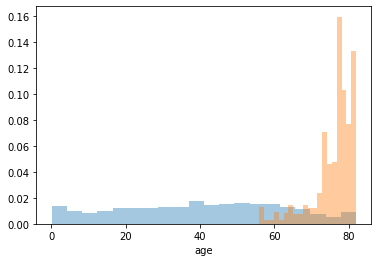

In [38]:
sns.distplot(test_data.loc[test_data['stroke'] == 0]['age'],kde=False, norm_hist=True, bins=20)
sns.distplot(test_data.loc[test_data['stroke'] == 1]['age'],kde=False, norm_hist=True, bins=20)

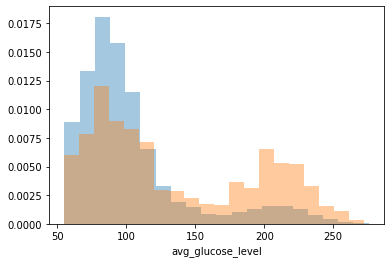

In [39]:
sns.distplot(test_data.loc[test_data['stroke'] == 0]['avg_glucose_level'],kde=False, norm_hist=True, bins=20)
sns.distplot(test_data.loc[test_data['stroke'] == 1]['avg_glucose_level'],kde=False, norm_hist=True, bins=20)

#### With smoking removed

In [40]:
features = list(training_data_nosmoke.columns[1:10])
print(features)
X = training_data_nosmoke[features]
y = training_data_nosmoke['stroke']

['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi']


In [41]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.2, random_state=2)
tree = DecisionTreeClassifier()
tree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [42]:
#prediction on the known test set
pred = tree.predict(X_testset)
print("Precision: ", metrics.precision_score(y_testset,pred))
print("Accuracy: ", metrics.accuracy_score(y_testset, pred))
print("Classification report: ")
print(metrics.classification_report(y_testset,pred))
print("")
print("Confusion matrix: ")
print(metrics.confusion_matrix(y_testset,pred))

Precision:  0.08205128205128205
Accuracy:  0.9626728110599079
Classification report: 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      8519
           1       0.08      0.10      0.09       161

   micro avg       0.96      0.96      0.96      8680
   macro avg       0.53      0.54      0.54      8680
weighted avg       0.97      0.96      0.96      8680


Confusion matrix: 
[[8340  179]
 [ 145   16]]


In [43]:
ros=RandomOverSampler(random_state=42)
sm = SMOTE(random_state=27, ratio=1.0)

print(training_data_nosmoke.stroke.value_counts())


#X_res,y_res =ros.fit_resample(X_trainset,y_trainset)
X_res, y_res = sm.fit_sample(X_trainset, y_trainset)
#con=pd.concat([X_trainset,y_trainset], axis=1)
#stroke = con[con.stroke==1]
#no_stroke = con[con.stroke==0]
#stroke_upsampled = resample(stroke,
#                          replace=True, # sample with replacement
#                          n_samples=len(no_stroke), # match number in majority class
#                          random_state=27) # reproducible results

# combine majority and upsampled minority
#upsampled = pd.concat([no_stroke, stroke_upsampled])

# check new class counts
print('Resampled dataset shape %s' % Counter(y_res))


#X_trainset_up = upsampled[features]
#y_trainset_up = upsampled['stroke']


#tree_up = DecisionTreeClassifier()
#tree_up.fit(X_trainset_up,y_trainset_up)
#pred_up = tree.predict(X_testset)
tree_up = DecisionTreeClassifier()
tree_up.fit(X_res,y_res)
pred_up = tree_up.predict(X_testset)
#prediction on the known test set
print("Precision: ", metrics.precision_score(y_testset,pred_up))
print("Accuracy: ", metrics.accuracy_score(y_testset,pred_up))
print("Classification report: ")
print(metrics.classification_report(y_testset,pred_up))
print("")
print("Confusion matrix: ")
print(metrics.confusion_matrix(y_testset,pred_up))

0    42617
1      783
Name: stroke, dtype: int64
Resampled dataset shape Counter({0: 34098, 1: 34098})
Precision:  0.07075471698113207
Accuracy:  0.9604838709677419
Classification report: 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      8519
           1       0.07      0.09      0.08       161

   micro avg       0.96      0.96      0.96      8680
   macro avg       0.53      0.54      0.53      8680
weighted avg       0.97      0.96      0.96      8680


Confusion matrix: 
[[8322  197]
 [ 146   15]]


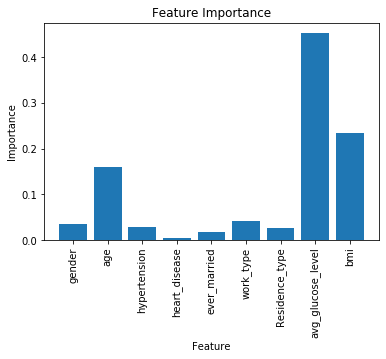

['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi']


In [44]:
# plot feature importance
plt.bar(range(len(tree.feature_importances_)), tree.feature_importances_)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.xticks(range(len(tree.feature_importances_)), features,rotation='vertical')
plt.show()
print(features)

In [45]:
#prediction on unknown test data
pred=tree.predict(test_data_nosmoke[features])
prediction = pd.DataFrame(pred,columns=['pred_stroke'])
test_data_nosmoke['stroke']=prediction['pred_stroke']
test_data_nosmoke['stroke'].value_counts()

0    18192
1      409
Name: stroke, dtype: int64

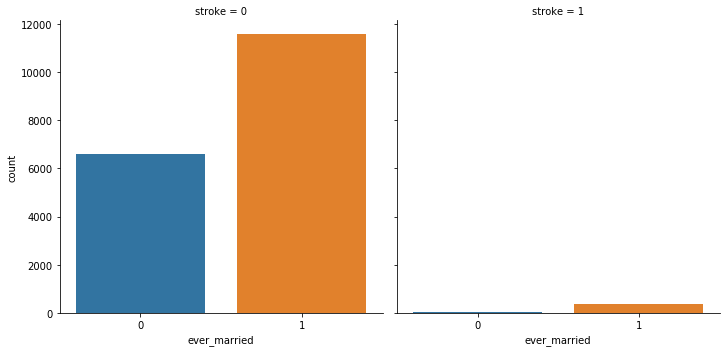

In [46]:
sns.catplot(x='ever_married',kind='count',col='stroke',data=test_data_nosmoke)

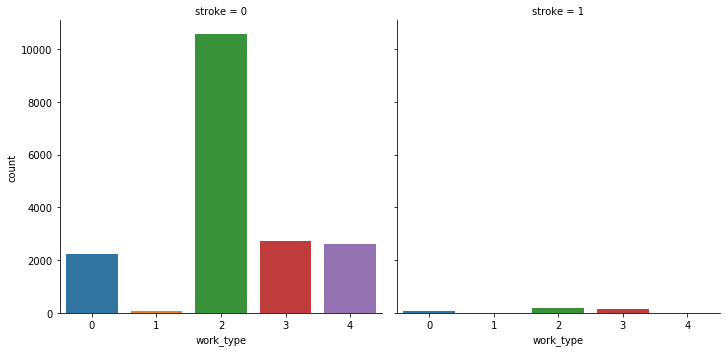

In [47]:
sns.catplot(x='work_type',kind='count',col='stroke',data=test_data_nosmoke)

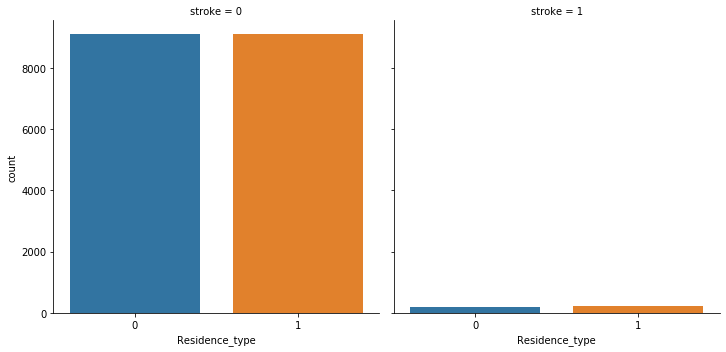

In [48]:
sns.catplot(x='Residence_type',kind='count',col='stroke',data=test_data_nosmoke)

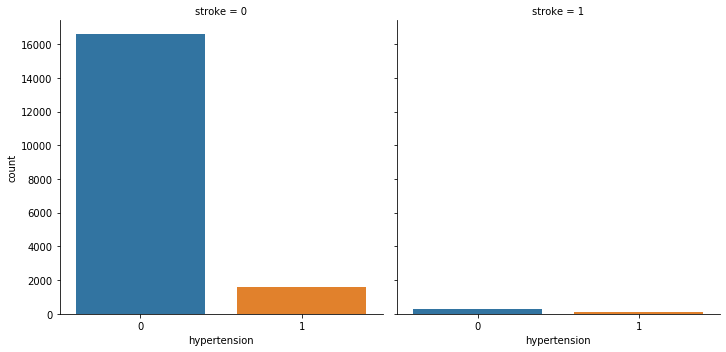

In [49]:
sns.catplot(x='hypertension',kind='count',col='stroke',data=test_data_nosmoke)

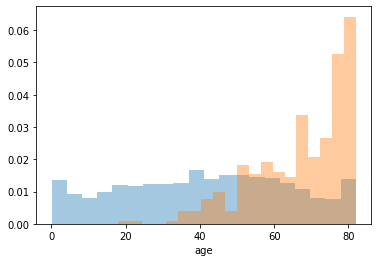

In [50]:
sns.distplot(test_data_nosmoke.loc[test_data_nosmoke['stroke'] == 0]['age'],kde=False, norm_hist=True, bins=20)
sns.distplot(test_data_nosmoke.loc[test_data_nosmoke['stroke'] == 1]['age'],kde=False, norm_hist=True, bins=20)

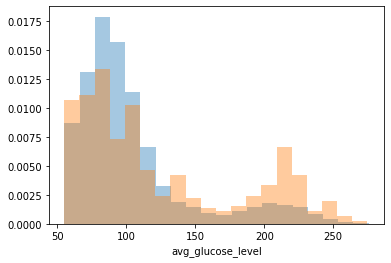

In [51]:
sns.distplot(test_data_nosmoke.loc[test_data_nosmoke['stroke'] == 0]['avg_glucose_level'],kde=False, norm_hist=True, bins=20)
sns.distplot(test_data_nosmoke.loc[test_data_nosmoke['stroke'] == 1]['avg_glucose_level'],kde=False, norm_hist=True, bins=20)